# OpenRouter
The [OpenRouter provider](https://openrouter.ai/) allows access to a couple of LLMs from different sources. In this notebook we will test if it works for a couple of LLMs. 

In [1]:
from bia_bob import bob, ask_llm

In [2]:
bob.initialize(model="anthropic/claude-3.7-sonnet", endpoint="openrouter")

In [3]:
%bob Load blobs.tif, binarize it and visualize the result

I will load an image of blobs, convert it to a binary image by thresholding, and visualize both the original and the binary result.



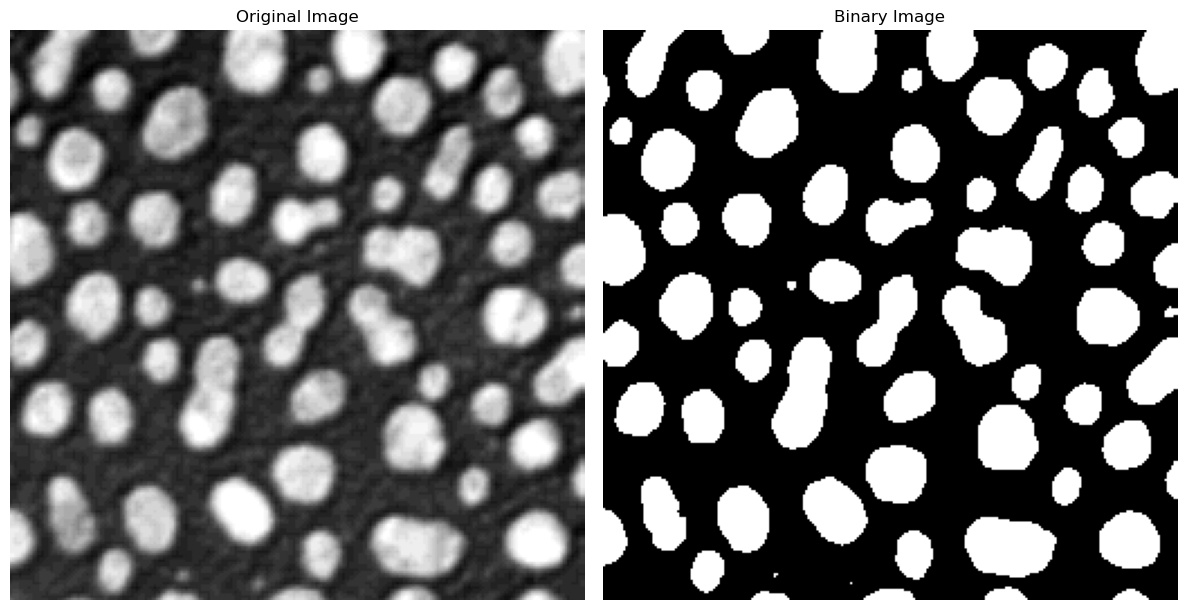

In [4]:
# Import necessary libraries
from skimage import io, filters
import matplotlib.pyplot as plt
import numpy as np
import stackview

# Load the blobs image
image = io.imread('blobs.tif')

# Binarize the image using Otsu's method
threshold = filters.threshold_otsu(image)
binary = image > threshold

# Visualize the original and binary images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(binary, cmap='gray')
axes[1].set_title('Binary Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Interactive visualization using stackview
stackview.curtain(image, binary)

## Testing other models in a loop
This is just for testing if other models provided via OpenRouter work as well.

In [6]:
models = [
    "anthropic/claude-3.7-sonnet", 
    "anthropic/claude-3.5-sonnet", 
    "deepseek/deepseek-v3-base:free", 
    "openai/gpt-4o-2024-11-20", 
    "openai/gpt-4o-2024-08-06", 
    "google/gemini-2.5-pro-exp-03-25:free", 
    "google/gemini-pro-1.5", 
    "google/gemini-2.0-flash-001", 
    "mistralai/mistral-small-3.1-24b-instruct:free", 
]

for m in models:
    try:
        print("---\n", m)
        bob.initialize(model=m, endpoint="openrouter")
        print(ask_llm("Hello world"))
    except:
        print("FAILED!")

---
 anthropic/claude-3.7-sonnet


Hello! How can I assist you today? Whether you have questions, need information, or just want to chat, I'm here to help. Let me know what's on your mind!
---
 anthropic/claude-3.5-sonnet


Hi! How can I help you today?
---
 deepseek/deepseek-v3-base:free


FAILED!
---
 openai/gpt-4o-2024-11-20


Hello! How can I assist you today? 😊
---
 openai/gpt-4o-2024-08-06


Hello! How can I assist you today?
---
 google/gemini-2.5-pro-exp-03-25:free


FAILED!
---
 google/gemini-pro-1.5


Hello world back to you!

---
 google/gemini-2.0-flash-001


Hello there! How can I help you today?

---
 mistralai/mistral-small-3.1-24b-instruct:free


FAILED!
